### 【問題1】$2×2$マスのチェス盤の小麦の数
$2×2$マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。


サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [1]:
# サンプルコード
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

import numpy as np
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [2]:
# 変形
small_board_ndarray = small_board_ndarray.reshape(2, 2)
small_board_ndarray

array([[1, 2],
       [4, 8]])

### 【問題2】$n×m$マスへの拡張
$n×m$マスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い$8×8$マスのチェス盤の小麦の数を求めてください。

In [3]:
def create_nm_matrix(n, m):
    
    list_tmp = [1]
    for _ in range(n*m - 1):
        list_tmp.append(2*list_tmp[-1])
    
    nm_matrix = np.array(list_tmp)
    nm_matrix = nm_matrix.reshape(n ,m)
    
    return nm_matrix


In [4]:
matrix_8x8 = create_nm_matrix(8, 8)
matrix_8x8

array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
       [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
        1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
       [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
        2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09],
       [4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
        6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
       [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
        1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
       [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
        4.50359963e+15, 9.00719925e+15, 1.80143985e+16, 3.

### 【問題3】小麦の数の合計
$8×8$マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。


棒グラフはサンプルコードを用意しています。

In [5]:
# 合計
matrix_8x8 = create_nm_matrix(8, 8)
sum_komugi = matrix_8x8.sum()
sum_komugi

1.8446744073709552e+19

In [6]:
# 各列の平均
avarage = np.mean(matrix_8x8, axis=0)
avarage

array([9.04252160e+15, 1.80850432e+16, 3.61700864e+16, 7.23401728e+16,
       1.44680346e+17, 2.89360691e+17, 5.78721383e+17, 1.15744277e+18])

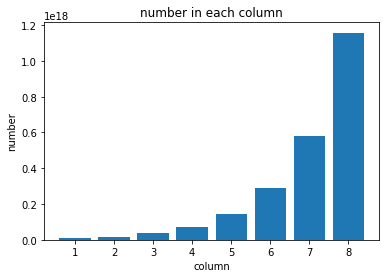

In [7]:
# 棒グラフ
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), avarage)
plt.show()

### 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。


ヒートマップはサンプルコードを用意しています。

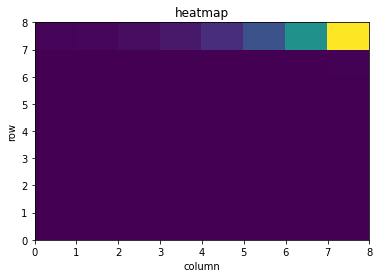

In [8]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(matrix_8x8)
plt.show()

７行目の値が大きすぎて、かなり読みづらい。

Text(0.5, 1.0, 'heatmap')

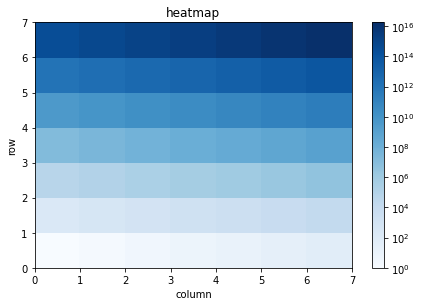

In [9]:
from matplotlib.colors import LogNorm

# グリッドの作成
x = np.arange(0, 8)
y = np.arange(0, 8)
X, Y = np.meshgrid(x, y)

# オブジェクトの生成
fig, ax = plt.subplots()
colormap = ax.pcolor(X, Y, matrix_8x8, norm=LogNorm(), cmap="Blues")

#カラーバーの表示
fig.colorbar(colormap, ax=ax)

# 余白の自動調整。パラメータの指定もできる。
fig.tight_layout()

# ラベルの表示
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")


オブジェクト指向記法を用いてログスケールで表示。
cmapを指定すると色の濃さで値の大きさがわかるので、直感的に理解しやすい。

### 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [20]:
sum_first = matrix_8x8[:4].sum()
sum_latter = matrix_8x8[4:].sum()

div_first_latter = sum_latter / sum_first
print("{}倍".format(div_first_latter))

4294967296.0倍


### 【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、`np.append()`を使ったものと、ブロードキャストを使ったもので新たに作成してください。

それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [40]:
def create_nm_matrix_kai1(n, m):
    
    ndarray_tmp = np.array([1]).astype(np.uint64)
    for _ in range(n*m - 1):
        ndarray_tmp = np.append(ndarray_tmp, 2*ndarray_tmp[-1])
    
    ndarray_tmp = ndarray_tmp.reshape(n ,m)
    
    return ndarray_tmp

In [41]:
matrix_8x8_2 = create_nm_matrix_kai1(8, 8)
matrix_8x8_2

array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
       [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
        1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
       [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
        2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09],
       [4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
        6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
       [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
        1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
       [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
        4.50359963e+15, 9.00719925e+15, 1.80143985e+16, 3.

In [46]:
def create_nm_matrix_kai2(n, m):
    
    ndarray_tmp = np.arange(n*m).astype(np.uint64)
    ndarray_tmp = 2**ndarray_tmp
    ndarray_tmp = ndarray_tmp.reshape(n ,m)
    
    return ndarray_tmp

In [47]:
matrix_8x8_3 = create_nm_matrix_kai2(8, 8)
matrix_8x8_3

array([[                  1,                   2,                   4,
                          8,                  16,                  32,
                         64,                 128],
       [                256,                 512,                1024,
                       2048,                4096,                8192,
                      16384,               32768],
       [              65536,              131072,              262144,
                     524288,             1048576,             2097152,
                    4194304,             8388608],
       [           16777216,            33554432,            67108864,
                  134217728,           268435456,           536870912,
                 1073741824,          2147483648],
       [         4294967296,          8589934592,         17179869184,
                34359738368,         68719476736,        137438953472,
               274877906944,        549755813888],
       [      1099511627776,       

### 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの`%%timeit`を用いて計測し、比較と考察を行ってください。

`%%timeit`はセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [48]:
%%timeit
matrix_8x8 = create_nm_matrix(8, 8)
matrix_8x8

11.4 µs ± 30.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [49]:
%%timeit
matrix_8x8_2 = create_nm_matrix_kai1(8, 8)
matrix_8x8_2

351 µs ± 7.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
%%timeit
matrix_8x8_3 = create_nm_matrix_kai2(8, 8)
matrix_8x8_3

2.57 µs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### 結果比較
以下の順で処理時間が短かった。
1. adarray(要素分)作成→ブロードキャスト
2. リスト作成→for文内でリスト.append→np.reshape
3. adarray(1要素のみ)作成→np.append

#### 考察
1. ブロードキャストはnumpy内の処理であり、C言語(コンパイル済みのライブラリ)で実装されているために高速であると思われる。
(参考：https://interface.cqpub.co.jp/wp-content/uploads/if01_090.pdf)
2. 型への要素追加について、listよりもadarrayのほうが時間がかかる。高速なライブラリであったとしても、要素追加するだけであるなら流石に組み込みで持っている型へ実施したほうが速い。
3. 2.について。listはリンクで結合する形式でメモリに保存されるので、動的な領域変更が可能。ndarrayは連続した領域にメモリを確保する仕様になっており、要素追加の際は領域削除・再作成を行わなければならないため、要素追加は時間がかかる。
(参考：http://www.kamishima.net/mlmpyja/nbayes1/ndarray.html)

3.について検証してみる。

In [76]:
# リストへの要素追加
test_list = [i for i in range(8)]
print(id(test_list))
test_list.append(8)
print(id(test_list))

139682406143312
139682406143312


In [79]:
# ndarrayへの要素追加
test_array = np.arange(8)
print(id(test_array))
print(test_array)
test_array = np.append(test_array, 8)
print(id(test_array))
print(test_array)

# (おまけ)ndarrayの要素削除
test_array = np.delete(test_array, 0)
print(id(test_array))
print(test_array)

139682387414832
[0 1 2 3 4 5 6 7]
139682382451456
[0 1 2 3 4 5 6 7 8]
139682385221872
[1 2 3 4 5 6 7 8]


確かにndarrayは要素追加の前後でオブジェクトが違っている。
削除時もオブジェクトの削除・再作成を行っている。